# Bad-day filter

### This notebook is fourth in the series of soiling detection pipeline notebooks (following step after the notebook <font color='green'>big_drop_filter.ipynb</font>)

Author: Lina Siegrist

In [36]:
import pandas as pd
import numpy as np
import copy
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
from pathlib import Path

In [37]:
from sys import path as syspath
syspath.insert(1, '../src/')

In [38]:
from scripts import apply_filters as af, filter_times as ft

## Import data from previous notebooks

In [39]:
working_dir = "../data/temp/park1/"

In [40]:
root_path = "../data/temp/park1/big_drop_filter/"
EPI_bigdrop_filt_filepath = root_path + "EPI_bigdrop_filt.csv"

In [41]:
def read_data(EPI_bigdrop_filt_filepath):
    EPI_drops_filt = pd.read_csv(EPI_bigdrop_filt_filepath, delimiter=',',parse_dates=['datetime'], date_parser = pd.to_datetime, index_col='datetime')
    return EPI_drops_filt

In [42]:
EPI_drops_filt = read_data(EPI_bigdrop_filt_filepath)

## Functions

In [43]:
def bad_day_filter_plot(df, threshold=1): # freqency of df: day
 
    # calculate mean & std of df_string_mean
    anal = pd.Series(df.values.ravel()).describe()
    mean = anal[1]
    std = anal[2]

    # plot histogram of df_string_mean
    ax = df.plot.hist(legend=False,color='orange',alpha=0.1)
    plt.axvline(mean, color='r', linestyle='dashed', linewidth=2)
    plt.axvline(mean - (threshold * std), color='b', linestyle='dashed', linewidth=2)
    plt.axvline(mean + (threshold * std), color='b', linestyle='dashed', linewidth=2)
    plt.figtext(0.1, -0.05, 'mean', horizontalalignment='left', color='r',fontsize=15);
    plt.figtext(0.1, -0.1, 'mean ± threshold * std', horizontalalignment='left', color='b',fontsize=15);
    ax.set_ylabel('Frequency',fontsize=20)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
#     ax.set_xticks(np.arange(0.3, 1.2, 0.2),minor=False)
    ax.set_title('Density plot of mean of each string',fontsize=20)
#     ax.set_xlim(0.25,1.2)

## Apply bad-day filter on big-drop-filtered data 

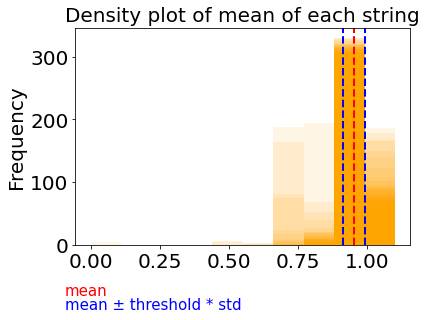

In [44]:
# decide the threshold (std) by plotting histogram: distribution of 'mean of string outputs' 
bad_day_filter_plot(EPI_drops_filt, threshold = 1)

In [50]:
# get boolean for bad (True) and good (False) days
badday_mask = ft.bad_day_filter(EPI_drops_filt, threshold = 2)

In [51]:
# mask (substitute) data with NaN for bad days
EPI_dropsfilt_baddayfilt = EPI_drops_filt.mask(badday_mask)

In [52]:
# Resulting DataFrame: big-drop & bad-day filtered (freq: day)
EPI_dropsfilt_baddayfilt

,ST 1.1.1_(kW),ST 1.1.2_(kW),ST 1.1.3_(kW),ST 1.1.4_(kW),ST 1.2.1_(kW),ST 1.2.4_(kW),ST 1.2.5_(kW),ST 1.2.6_(kW),ST 1.3.1_(kW),ST 1.3.2_(kW),...,ST 6.7.2_(kW),ST 6.7.3_(kW),ST 6.7.4_(kW),ST 6.7.5_(kW),ST 6.7.6_(kW),ST 6.8.1_(kW),ST 6.8.3_(kW),ST 6.8.4_(kW),ST 6.8.5_(kW),ST 6.8.6_(kW)
datetime,,,,,,,,,,,,,,,,,,,,,
2019-06-01,0.986981,0.996409,0.997207,1.023194,0.952104,0.966154,0.961962,NaN,0.994676,0.986912,...,0.989736,0.921852,0.923256,0.935270,0.926173,0.949131,0.987622,0.949075,0.989056,0.979086
2019-06-02,1.001402,0.999512,1.002275,1.019518,0.974215,0.987551,0.973091,NaN,0.999549,0.974538,...,0.952043,0.910837,0.916710,0.916799,0.913746,0.928250,0.976995,0.937928,0.979830,0.979616
2019-06-03,0.986311,0.978662,0.985166,1.000835,0.954850,0.960627,0.954495,NaN,0.992645,0.962915,...,0.954711,0.898648,NaN,0.910527,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-04,0.975692,0.968164,0.980168,0.996003,0.932291,0.944229,0.932587,NaN,0.969349,0.937913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-05,0.992407,0.983990,0.991595,1.005694,0.953283,0.965098,0.949580,0.908313,0.999812,0.966295,...,0.958372,0.920717,0.918648,0.927256,0.898592,0.936357,0.982272,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.020313,0.942941,0.937965,NaN,0.927055,NaN,NaN,NaN,1.014054,0.964048
2020-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-06-28,NaN,NaN,NaN,NaN,1.018173,1.015977,NaN,1.031441,NaN,1.024095,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
##save data function from Marcus's scripts
def save_data(dataframes, names, root_dir, sub_dir):

    if root_dir[-1] != "/":
                root_dir += "/"

    if sub_dir[-1] != "/":
                root_dir += sub_dir + "/"

    for data, name in zip(dataframes, names):
        try:
            filepath_out = root_dir + name + ".csv"
            Path(root_dir).mkdir(parents=True, exist_ok=True)
            print(f"\tSaving {filepath_out}...")
            data.to_csv(filepath_out)
            print("\tDone.")
        except Exception as e:
            print(e)
            pass

In [54]:
save_data([EPI_dropsfilt_baddayfilt, badday_mask], ["EPI_dropsfilt_baddayfilt","badday_mask"], working_dir, "bad_day_filter")

	Saving ../data/temp/park1/bad_day_filter/EPI_dropsfilt_baddayfilt.csv...
	Done.
	Saving ../data/temp/park1/bad_day_filter/badday_mask.csv...
	Done.


## Plot: Filtered EPI (big-drop filter & bad-day filter)

## Create a Dataframe of '<font color='red'>median</font> EPI of all strings per day'

In [33]:
EPI_dropsfilt_baddayfilt['median_EPI'] = EPI_dropsfilt_baddayfilt.loc[:, :].median(axis = 1)
EPI_dropsfilt_baddayfilt_daily_median = EPI_dropsfilt_baddayfilt[['median_EPI']]

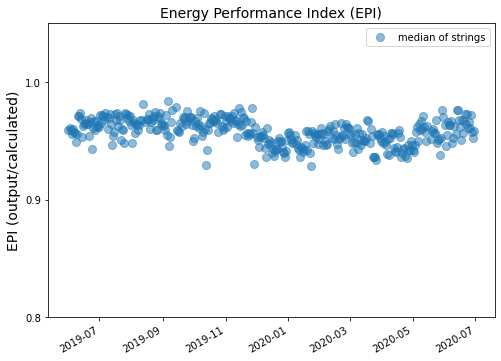

In [34]:
ymin=0.8
ymax=1.05

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(EPI_dropsfilt_baddayfilt_daily_median.index, EPI_dropsfilt_baddayfilt_daily_median, 'o', markersize = 8,alpha = 0.5, label='median of strings')
ax.set_ylim(ymin,ymax)
fig.autofmt_xdate()
ax.set_yticks(np.arange(ymin,ymax,0.1),minor=False)
ax.set_ylabel('EPI (output/calculated)',fontsize=14)
ax.set_title('Energy Performance Index (EPI)',fontsize=14)
leg = ax.legend();